In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
country = 'India'
df = pd.read_csv("../../../data/processed/co2_country.csv", parse_dates=True)
df = df.loc[df['country'] == country, ['year', 'co2']]
df.head()

,year,co2
5184,1950,61.103
5185,1951,64.022
5186,1952,67.426
5187,1953,68.705
5188,1954,72.414


In [3]:
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]


In [4]:
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train = poly.fit_transform(train_data['year'].values.reshape(-1,1))
X_test = poly.transform(test_data['year'].values.reshape(-1,1))
y_train = train_data['co2'].values
y_test = test_data['co2'].values

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [7]:
train_score = np.sqrt(np.mean(np.square(y_train - train_predictions)))
test_score = np.sqrt(np.mean(np.square(y_test - test_predictions)))
print('Train Score: %.2f RMSE' % (train_score))
print('Test Score: %.2f RMSE' % (test_score))

Train Score: 20.28 RMSE
Test Score: 316.06 RMSE


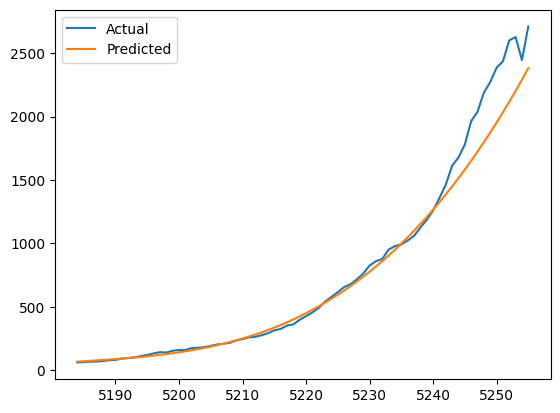

In [8]:
plt.plot(df.index, df['co2'], label='Actual')
plt.plot(np.concatenate((train_data.index.to_numpy(), test_data.index.to_numpy())),np.concatenate((train_predictions, test_predictions)), label='Predicted')
plt.legend()
plt.show()

In [9]:
future_dates = pd.date_range(start='2010', end='2030', freq='Y')
future_predictions = poly.transform(future_dates.values.reshape(-1,1))
future_predictions = model.predict(future_predictions)
future_predictions

array([1.28460340e+52, 1.38085070e+52, 1.48207234e+52, 1.58782711e+52,
       1.69849670e+52, 1.81419275e+52, 1.93536510e+52, 2.06146350e+52,
       2.19292357e+52, 2.32985692e+52, 2.47277343e+52, 2.62100401e+52,
       2.77504309e+52, 2.93500229e+52, 3.10145640e+52, 3.27360772e+52,
       3.45201436e+52, 3.63678795e+52, 3.82857311e+52, 4.02643371e+52])

In [10]:
future_df = pd.DataFrame({'year': future_dates.ravel(), 'co2': future_predictions.ravel()})
future_df.set_index('year', inplace=True)

df = pd.read_csv("../../../data/processed/co2_country.csv", index_col='year', parse_dates=True)
df = df.loc[df['country'] == country, ['co2']]

df.head()

C:\Users\mohdz\AppData\Local\Temp\ipykernel_21440\1048788489.py:1: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  future_df = pd.DataFrame({'year': future_dates.ravel(), 'co2': future_predictions.ravel()})


,co2
year,
1950-01-01,61.103
1951-01-01,64.022
1952-01-01,67.426
1953-01-01,68.705
1954-01-01,72.414


In [11]:
future_df.head()

,co2
year,
2010-12-31,1.284603e+52
2011-12-31,1.380851e+52
2012-12-31,1.482072e+52
2013-12-31,1.587827e+52
2014-12-31,1.698497e+52


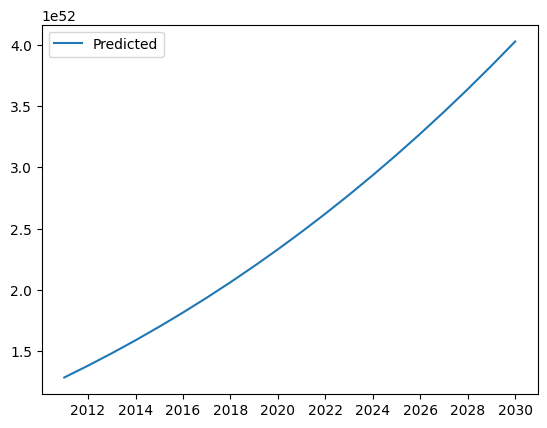

In [12]:
# plt.plot(df.index, df['co2'], label='Actual')
plt.plot(future_df.index, future_df.co2, label='Predicted')
plt.legend()
plt.show()